In [1]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')

In [2]:
import yfinance as yf

stock = "BTC-USD"

df = yf.download(stock, start="2015-01-01", end="2025-01-01", progress=False, auto_adjust=True)



In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [4]:
df.shape

(3653, 5)

In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3653.000000,3653.000000,3653.000000,3653.000000,3.653000e+03
mean,20143.632506,20572.731211,19647.284273,20119.444340,1.912152e+10
std,22198.143979,22657.054772,21667.676416,22169.391660,2.038557e+10
min,178.102997,211.731003,171.509995,176.897003,7.860650e+06
25%,2589.409912,2682.260010,2510.479980,2577.770020,1.182870e+09
50%,9665.533203,9834.716797,9460.571289,9664.904297,1.550425e+10
75%,32186.277344,33327.101562,31030.265625,32138.873047,3.021494e+10
max,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11


In [6]:
df.isna().sum()

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [7]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
1,2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2,2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
3,2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
4,2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [11]:
df1 = df.to_csv('BTC-USD.csv', index=False)

In [12]:
df1 = pandas.read_csv('BTC-USD.csv')

In [13]:
df1.head()

,Date,Close,High,Low,Open,Volume
0,NaN,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,2015-01-01,314.2489929199219,320.43499755859375,314.00299072265625,320.43499755859375,8036550
2,2015-01-02,315.0320129394531,315.8389892578125,313.56500244140625,314.0790100097656,7860650
3,2015-01-03,281.0820007324219,315.1499938964844,281.0820007324219,314.84600830078125,33054400
4,2015-01-04,264.19500732421875,287.2300109863281,257.61199951171875,281.14599609375,55629100


In [16]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df1['Date'],
                                     open=df1['Open'],
                                     high=df1['High'],
                                     low=df1['Low'],
                                     close=df1['Close'])])

fig.update_layout(title=f'{stock} Price History',
                    xaxis_title='Date',
                    yaxis_title='Price (USD)',
                    xaxis_rangeslider_visible=False)
fig.show()

In [18]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
1,2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2,2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
3,2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
4,2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [21]:
# Drop columns only if they exist in the DataFrame
columns_to_drop = ['Date', 'Adj Close']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

/var/folders/fw/fg0_f2fx5tn55v9k_2zxd6d00000gn/T/ipykernel_32459/2573064203.py:3: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [22]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,314.248993,320.434998,314.002991,320.434998,8036550
1,315.032013,315.838989,313.565002,314.079010,7860650
2,281.082001,315.149994,281.082001,314.846008,33054400
3,264.195007,287.230011,257.612000,281.145996,55629100
4,274.473999,278.341003,265.084015,265.084015,43962800


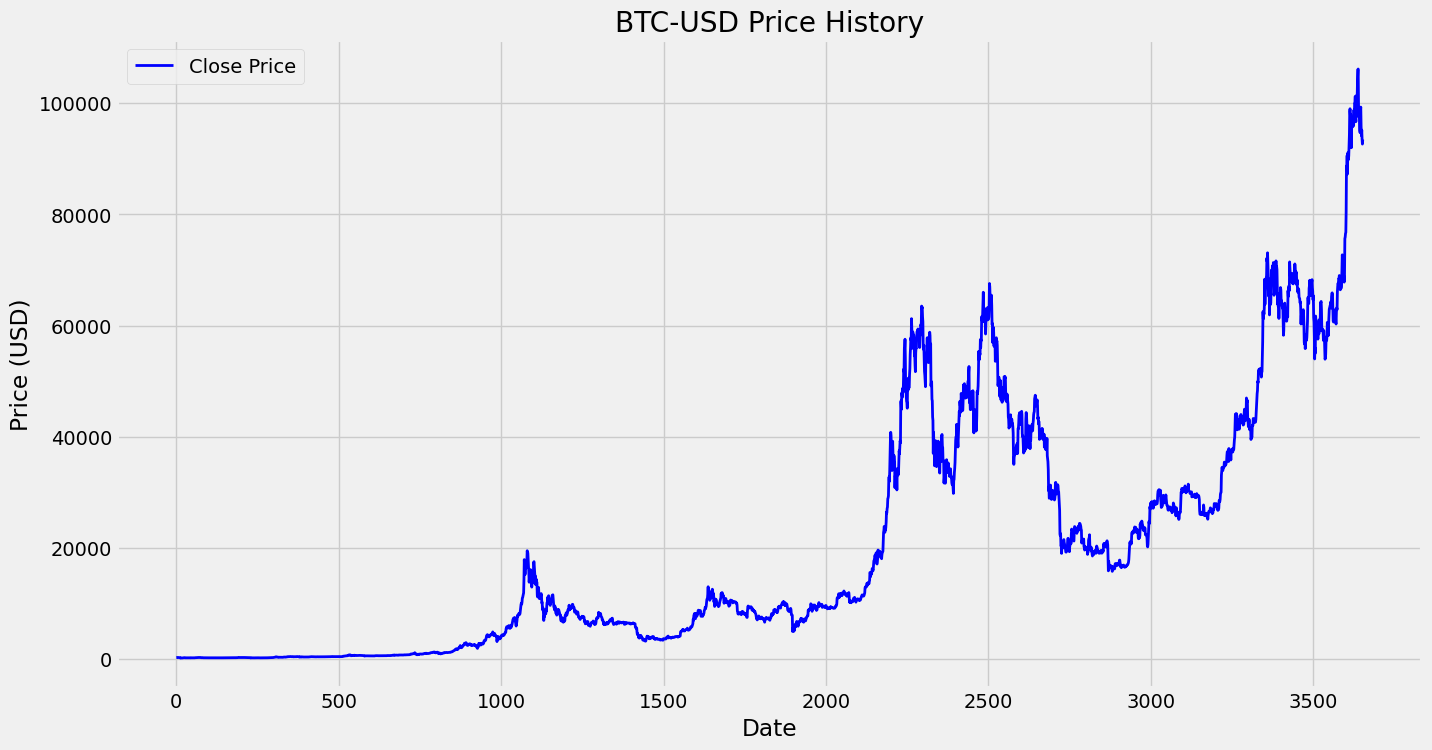

In [27]:
plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.title(f'{stock} Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

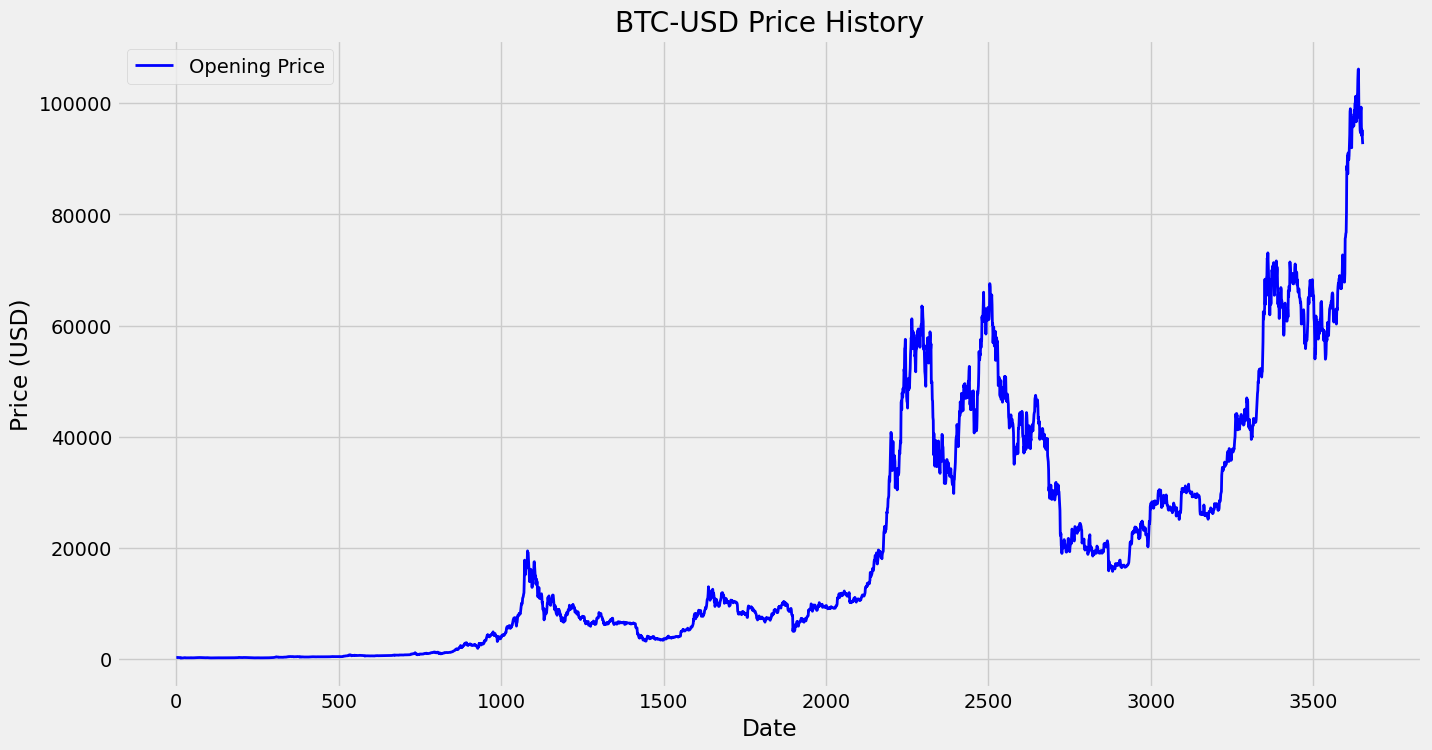

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(df['Open'], label='Opening Price', color='blue', linewidth=2)
plt.title(f'{stock} Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [31]:
ma100 = df['Close'].rolling(window=100).mean()
ma100

Ticker,BTC-USD
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3648,80702.473047
3649,81024.707773
3650,81328.080273
3651,81620.563984


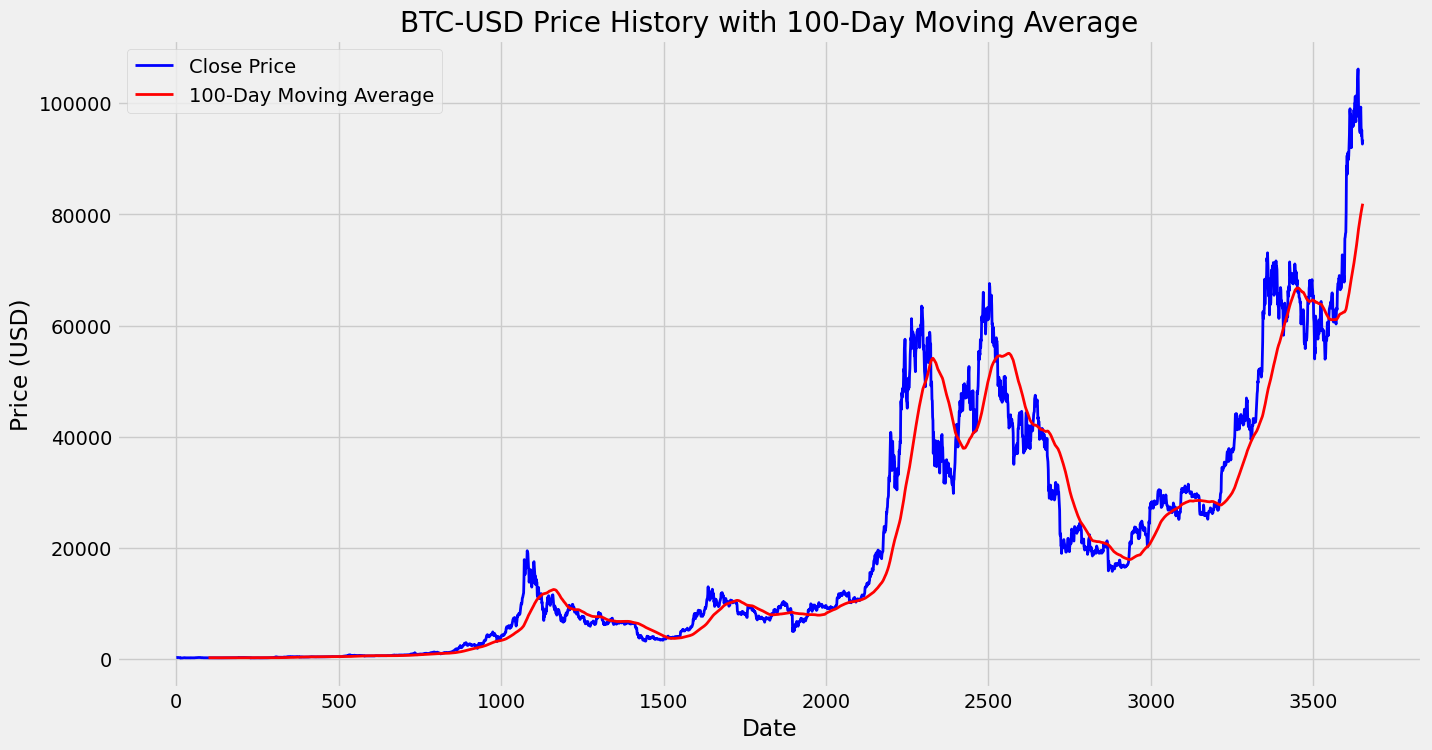

In [32]:
plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(ma100, label='100-Day Moving Average', color='red', linewidth=2)
plt.title(f'{stock} Price History with 100-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [35]:
ema100 = df.Close.ewm(span=20, adjust=False).mean()

In [37]:
df.pct_change()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,NaN,NaN,NaN,NaN,NaN
1,0.002492,-0.014343,-0.001395,-0.019835,-0.021888
2,-0.107767,-0.002181,-0.103593,0.002442,3.205047
3,-0.060079,-0.088593,-0.083499,-0.107036,0.682956
4,0.038907,-0.030947,0.029005,-0.057130,-0.209716
...,...,...,...,...,...
3648,-0.017022,-0.025927,-0.019205,-0.036181,0.114015
3649,0.010610,-0.018181,0.007540,-0.016141,-0.540109
3650,-0.017167,-0.003675,-0.012046,0.010767,0.229325


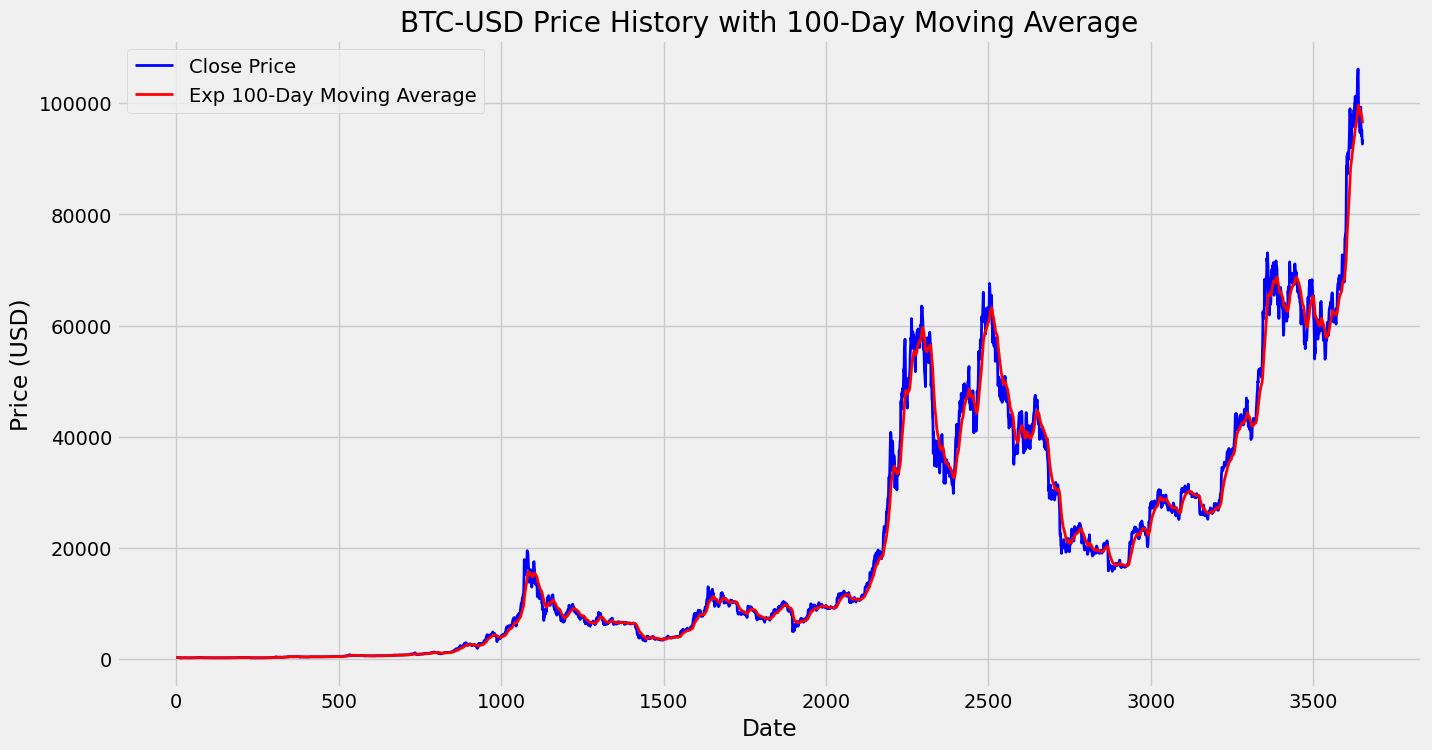

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(ema100, label='Exp 100-Day Moving Average', color='red', linewidth=2)
plt.title(f'{stock} Price History with 100-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [41]:
import pandas as pd
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [45]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.00202031],
       [0.00203193],
       [0.00152813],
       ...,
       [0.68656304],
       [0.69744637],
       [0.68451128]])

In [46]:
X_train = []
y_train = []

In [47]:
for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i, 0])
    y_train.append(data_training_array[i, 0])

In [48]:
x_train, y_train = numpy.array(X_train), numpy.array(y_train)

In [49]:
x_train.shape

(2457, 100)

In [ ]:
# %pip install tensorflow

In [54]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [56]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80, activation='relu' , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0023
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0016
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0019
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0017
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0016
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0014
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0017
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0017
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0014
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0013
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0018
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0013
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0012
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0012
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0016
Epoc

In [65]:
past_100_days = data_training.tail(100)

In [74]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [76]:
input_data = scaler.fit_transform(final_df)

In [103]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [104]:
x_test, y_test = numpy.array(x_test), numpy.array(y_test)

In [105]:
x_test.shape

(1096, 100, 1)

In [106]:
y_predicited = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [107]:
y_predicited.shape

(1096, 1)

In [108]:
y_test

array([0.35305321, 0.34927256, 0.33945442, ..., 0.86043263, 0.85061544,
       0.85931454])

In [109]:
scaler.scale_

array([1.10676623e-05])

In [110]:
scaler_factor = 1 / scaler.scale_[0]
y_predicited = y_predicited * scaler_factor
y_test = y_test * scaler_factor

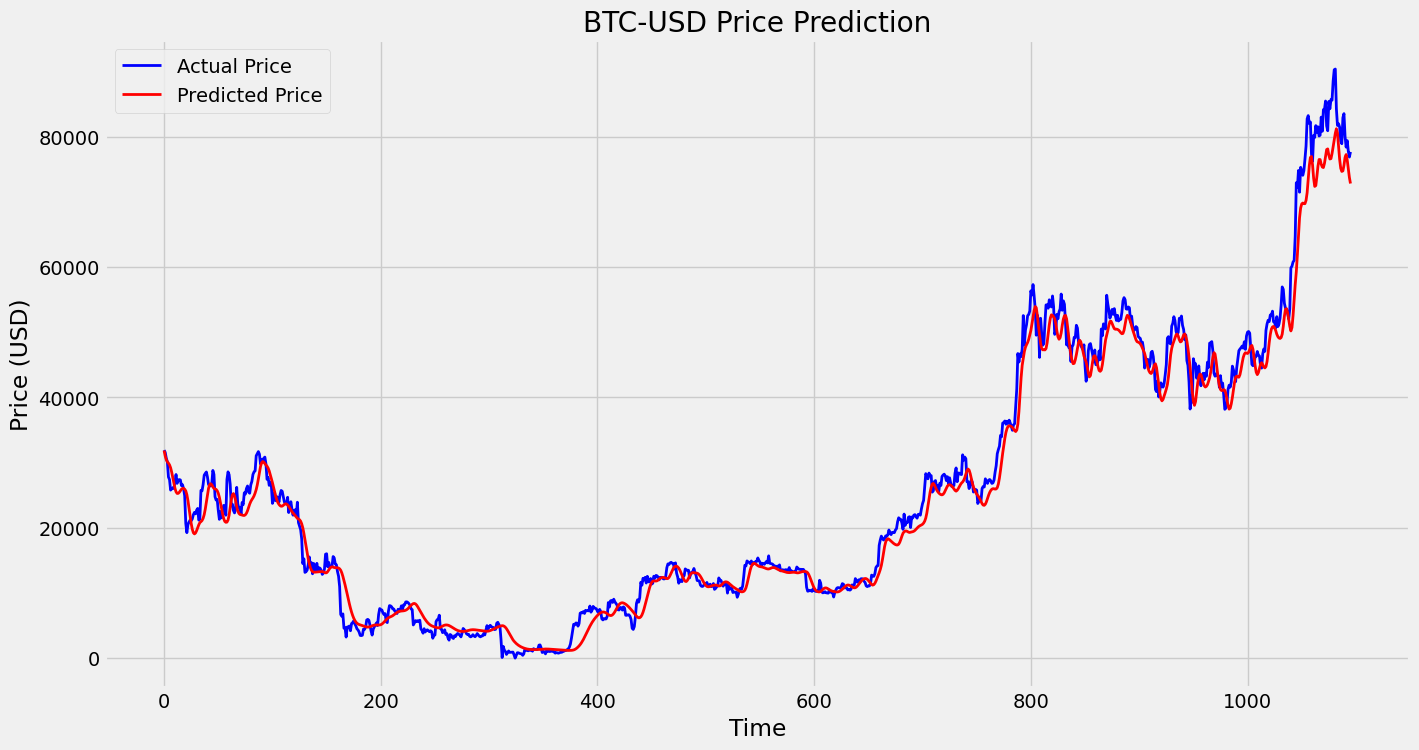

In [111]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='Actual Price', color='blue', linewidth=2)
plt.plot(y_predicited, label='Predicted Price', color='red', linewidth=2)
plt.title(f'{stock} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()